<a href="https://colab.research.google.com/github/Rafiqahh/APM_KLP10/blob/main/Polynomial_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mengimport Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

In [2]:
# Mengimport Dataset
df = pd.read_csv('surveylungcancer.csv')
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, -1].values

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
# Mengubah nilai kolom dan mengambil variabel dependen dan independen
dict_cancer = {
    'YES' : 2,
    'NO' : 1
}
df['Lung_Cancer'] = df['LUNG_CANCER'].apply(lambda x : dict_cancer[x])

feature_cols = ['AGE', 'SMOKING', 'ANXIETY', 'ALCOHOL CONSUMING','COUGHING']
X = df[feature_cols]
y = df['Lung_Cancer']

df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,Lung_Cancer
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,1


In [4]:
# Melakukan Split pada Training Set dan Test Set serta menghasilkan tuple berisikan (jumlah baris, jumlah kolom) dengan fungsi shape
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train.shape, X_test.shape

((247, 5), (62, 5))

In [5]:
# Melakukan Feature Scaling
cols = X.columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [6]:
# Menggunakan fungsi describe pada data train untuk menampilkan deskriptif statistik data
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,AGE,SMOKING,ANXIETY,ALCOHOL CONSUMING,COUGHING
count,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02,2.470000e+02
mean,-1.469809e-16,-3.416071e-17,1.294511e-16,2.292363e-16,-1.456325e-16
std,1.002030e+00,1.002030e+00,1.002030e+00,1.002030e+00,1.002030e+00
min,-3.114494e+00,-1.134477e+00,-9.564145e-01,-1.125191e+00,-1.202308e+00
25%,-6.115494e-01,-1.134477e+00,-9.564145e-01,-1.125191e+00,-1.202308e+00
50%,-1.109605e-01,8.814638e-01,-9.564145e-01,8.887379e-01,8.317336e-01
75%,7.650701e-01,8.814638e-01,1.045572e+00,8.887379e-01,8.317336e-01
max,3.017720e+00,8.814638e-01,1.045572e+00,8.887379e-01,8.317336e-01


In [7]:
#Melakukan pengklasifikasian training set dan prediksi pada test set dan menampilkan accuracy score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
poly_svc=SVC(kernel='poly', C=100.0) 


# fit classifier to training set
poly_svc.fit(X_train,y_train)


# make predictions on test set
y_pred=poly_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.8387


In [8]:
# Menampilkan Confusion Matrix dan Membagi 4 bagian

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 2  8]
 [ 2 50]]

True Positives(TP) =  2

True Negatives(TN) =  50

False Positives(FP) =  8

False Negatives(FN) =  2


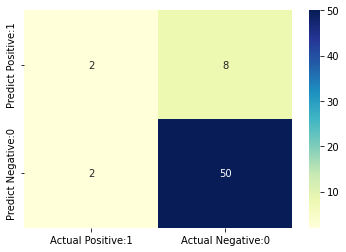

In [9]:
# Memvisualisasikan Confusion Matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [10]:
#Menampilkan Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.20      0.29        10
           2       0.86      0.96      0.91        52

    accuracy                           0.84        62
   macro avg       0.68      0.58      0.60        62
weighted avg       0.80      0.84      0.81        62

